In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pylab

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)


# Buisness Case: Walmart 

### About Walmart

- Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.



## Business Problem

- The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. 
- They want to understand if the spending habits differ between male and female customers:
> Do women spend more on Black Friday than men? 
(Assume 50 million customers are male and 50 million are female).

### Dataset

- The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
>
    - User_ID:	User ID
    - Product_ID:	Product ID
    - Gender:	Sex of User
    - Age:	Age in bins
    - Occupation:	Occupation(Masked)
    - City_Category:	Category of the City (A,B,C)
    - StayInCurrentCityYears:	Number of years stay in current city
    - Marital_Status:	Marital Status
    - ProductCategory:	Product Category (Masked)
    - Purchase:	Purchase Amount

In [2]:
# importing given sample dataset : 

df = pd.read_csv("E:\DSML Scaler\BusinessCase_Data_Exploration--main\Walmart_BlackFriday business Case\walmart_data.csv")


In [3]:
data = df.copy()

# Analysing Basic Metrics and Non-Graphical Analysis : 

In [4]:
data.shape

(550068, 10)

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
(data.isna().sum()/len(data))*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [9]:
# from above information, no null values detected.

In [10]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## Unique Values in each column : 
- 5891 unique customers 
- 3631 unique products  
- 7 different age groups 
- 3 different city 
- stay in current city from 0 to 5 years 
- Gender  , Marital status 
- 20 different product category 

In [11]:
# Purchase is the only numerical data 
# changing all other data types as string/category.

In [11]:
data["Product_Category"] = data["Product_Category"].astype("str")
data["Marital_Status"] = data["Marital_Status"].astype("str")
data["Occupation"] = data["Occupation"].astype("str")
data["User_ID"] = data["User_ID"].astype("str")

In [13]:
# describing data : 

In [12]:
data.describe(include="object")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [15]:
# replacing gender and marital status values.

In [16]:
data["Gender"].replace({"M":"Male",
                               "F":"Female"},inplace=True)
data["Marital_Status"].replace({"0":"Single",
                               "1":"Married"},inplace=True)

In [17]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Single,8,7969


In [18]:
data.duplicated().sum()

0

In [19]:
# No duplicated data in given dataset . 

In [20]:
# data.columns

### data distribution of Marital Status wise and Gender wise in given data set: 

In [21]:
data["Gender"].value_counts(normalize=True)*100

Male      75.310507
Female    24.689493
Name: Gender, dtype: float64

#### 75% male and 25% are female customers as per given sample data

In [22]:
data["Age"].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [23]:
# Majority of customers are between age 18-45 years . 

In [24]:
data["City_Category"].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [25]:
data["Marital_Status"].value_counts(normalize=True)*100

Single     59.034701
Married    40.965299
Name: Marital_Status, dtype: float64

#### from the given data: 
    75.31 % customers are male
    24.68 % customers are female

### from the prproblem statement : 
      company has 50 million customers are male and 50 million are female overall.


Given Sample is a gender biased . 


### Plots for basic distribution across given data : 

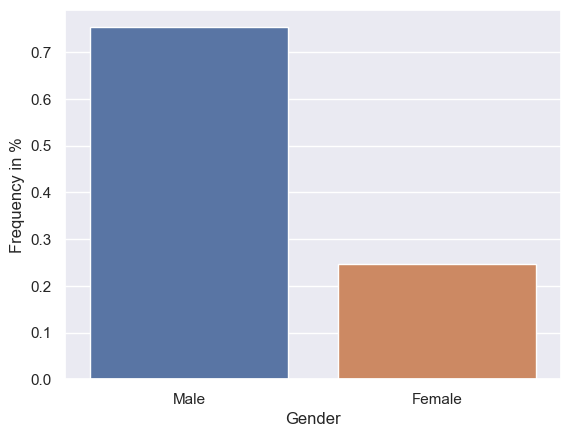

In [26]:
sns.barplot(x = data["Gender"].value_counts(normalize=True).index,
             y = data["Gender"].value_counts(normalize=True))
plt.xlabel("Gender")
plt.ylabel("Frequency in %")
plt.show()

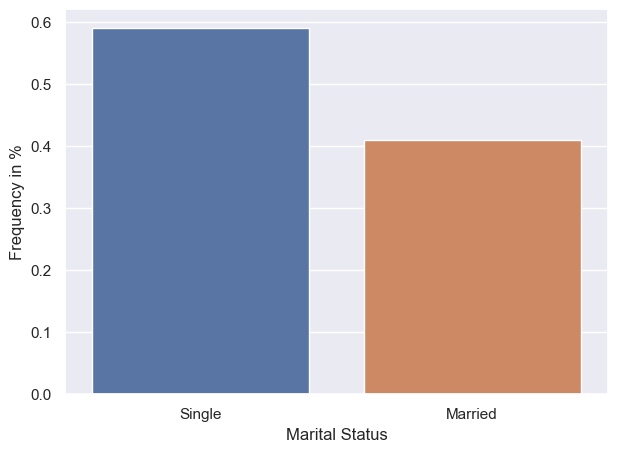

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(x = data["Marital_Status"].value_counts(normalize=True).index,
             y = data["Marital_Status"].value_counts(normalize=True))
plt.xlabel("Marital Status")
plt.ylabel("Frequency in %")
plt.show()

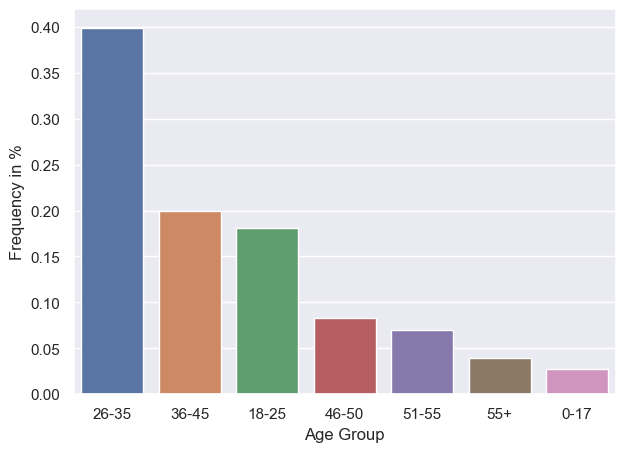

In [28]:
plt.figure(figsize=(7,5))
sns.barplot(x = data["Age"].value_counts(normalize=True).index,
             y = data["Age"].value_counts(normalize=True))
plt.xlabel("Age Group")
plt.ylabel("Frequency in %")
plt.show()

## Describing Purchase Statistic for Male and Female Data. 

In [29]:
Male_data = data.loc[data["Gender"]=="Male"]
Male_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,414259.0,9437.52604,5092.18621,12.0,5863.0,8098.0,12454.0,23961.0


In [30]:
Female_data = data.loc[data["Gender"]=="Female"]
Female_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0


## Describing Purchase Statistic for Married and Singe Customer Data. 

In [31]:
Single_data = data.loc[data["Marital_Status"]=="Single"]
Single_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0


In [32]:
Married_data = data.loc[data["Marital_Status"]=="Married"]
Married_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [33]:
# Male and female Customes Spending Amount distriubtion 

# checking if the purchase data is normally distributed 

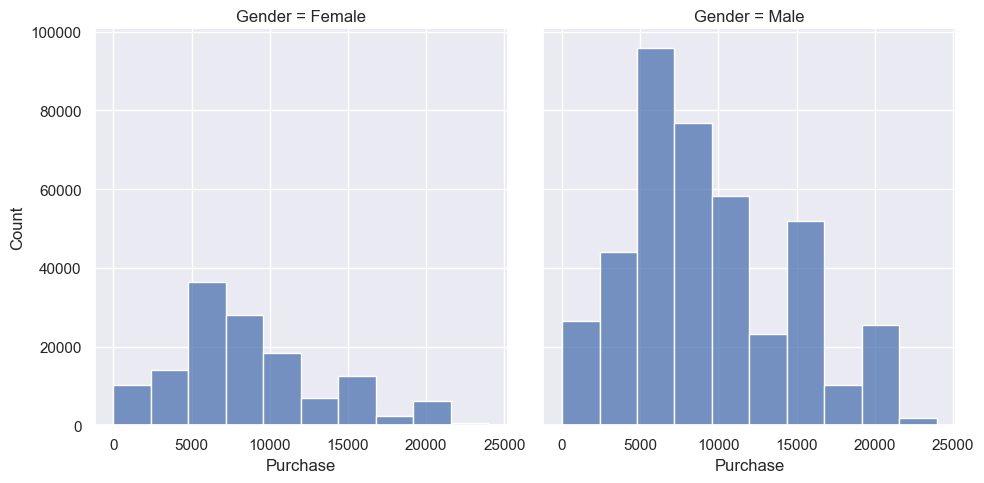

In [34]:
sns.displot(x = data["Purchase"], bins = 10, col=data["Gender"])
plt.show()

In [35]:
# Single and Married Customes Spending Amount distriubtion 

# checking if the purchase data is normally distributed 

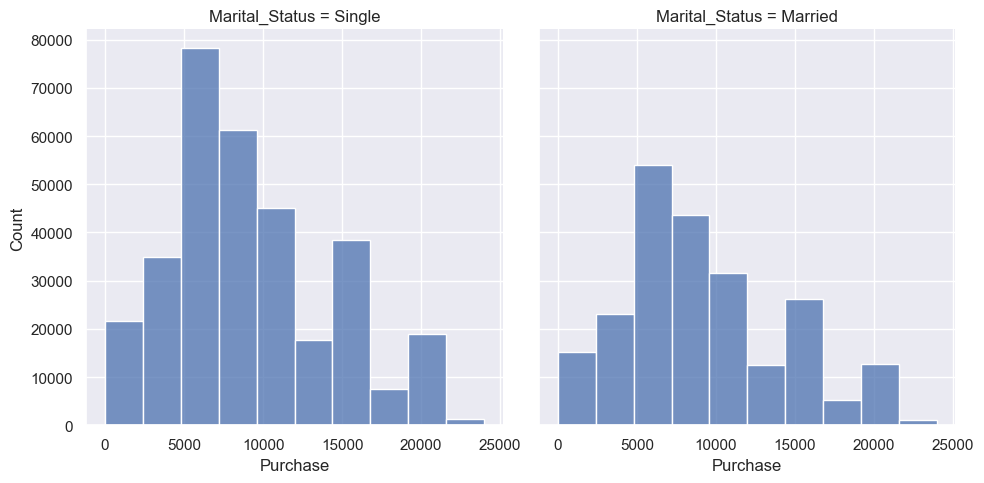

In [36]:
sns.displot(x = data["Purchase"], bins = 10, col=data["Marital_Status"])
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='Purchase'>

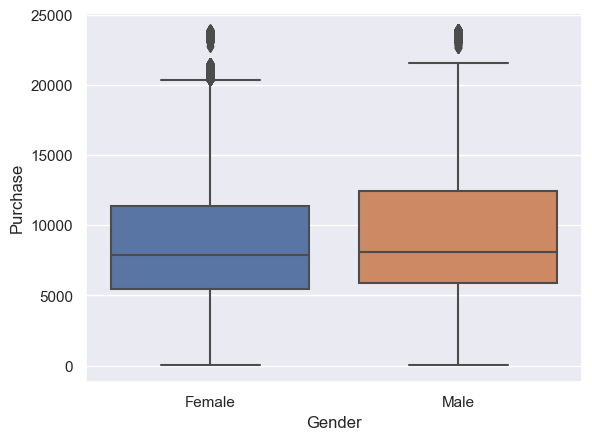

In [37]:
sns.boxplot(x = "Gender", y = "Purchase", data = data)

In [38]:
# observing , differences in mean and median values and as per boxplot , 
# outliers are there in data. 

#  Outliers Calculations:

In [39]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"
    

In [40]:
detect_outliers(data)

'0.0049 % Outliers data from input data found'

In [41]:
def detect_and_remove_outliers(data):
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    return data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)]


In [42]:
data = detect_and_remove_outliers(data)

# Balancing the gender despaires 

In [43]:
data["Gender"].value_counts()

Male      412171
Female    135220
Name: Gender, dtype: int64

In [44]:
135220/412171

0.3280677194659498

In [45]:
condition =  data["Gender"]=="Male"

In [46]:
samplemale = data[condition].sample(n=135809)
samplefemale = data.loc[data["Gender"]=="Female"]

In [47]:
unbiased_data = pd.concat([samplemale,samplefemale])

In [48]:
unbiased_data["Marital_Status"].value_counts(normalize=True)*100

Single     58.724712
Married    41.275288
Name: Marital_Status, dtype: float64

In [49]:
unbiased_data["Gender"].value_counts(normalize=True)*100

Male      50.10866
Female    49.89134
Name: Gender, dtype: float64

#### Purchase data in given dataset is not perfectly normal . So with the help of Central Limit Theorem we can plot a distribution.

### CLT on Purchase [ Gender Wise ]

In [50]:
def Bootstrapping_CLT_CI(data, confidence=95 , sample_size = 30000,trials = 200):
    
    
    '''
    data : array
    confidence level : Required Confidence Level
    Sample Size  : length of Sample Size
    Trials : How many times we take sample sample from data. 
    '''
    print("Data Distribution before Sampling/Bootstrap:")
    sns.distplot(data,bins = 15)
    plt.show()

    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
    print()
    print("Data Distribution After Sampling/Bootstraping:")
    sns.distplot(bootstrapped_mean,bins = 15)
    print()
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    print("t:",talfa_by2)
    margin_of_error = talfa_by2*standard_error
    print("sample mean :",sample_mean)
    print("sample standard deviation :",sample_std)
    print("sample size: ",sample_size)
    print("standard error :",standard_error)
    print("Margin of Error :",margin_of_error)


    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)

    plt.axvline(x = lower_,c = "r")
    plt.axvline(x = upper_,c = "r")
    plt.show()



    print("Confidence Interval : ",CI)


In [51]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

def plot_confidence_interval(x, values,  color='#2187bb', horizontal_line_width=0.25,confidence=95):
    
    def CI(data,confidence, sample_size=10000,trials = 500):

        bootstrapped_mean= np.empty(trials)

        for i in range(trials):
            btssample = data.sample(n=sample_size,replace=True)
            bootstrapped_mean[i] = np.mean(btssample)
        sample_mean = np.mean(bootstrapped_mean)
        sample_std = np.std(data)
        standard_error = sample_std/np.sqrt(sample_size)
        talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
        margin_of_error = talfa_by2*standard_error
        
        return margin_of_error,sample_mean+margin_of_error,sample_mean-margin_of_error
        
    

    
    error,bottom,top = CI(values,confidence)

    left = x - horizontal_line_width / 2
    top = np.mean(values) - error
    right = x + horizontal_line_width / 2
    bottom = np.mean(values) + error
    print("Confidence Interval : ",(top,bottom))
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, np.mean(values), 'o', color='#f44336')
    print("Sample Mean :",np.mean(values)," and ","Margin of Error :", error)


## Confidence Interval For Male (Purchase)

Data Distribution before Sampling/Bootstrap:


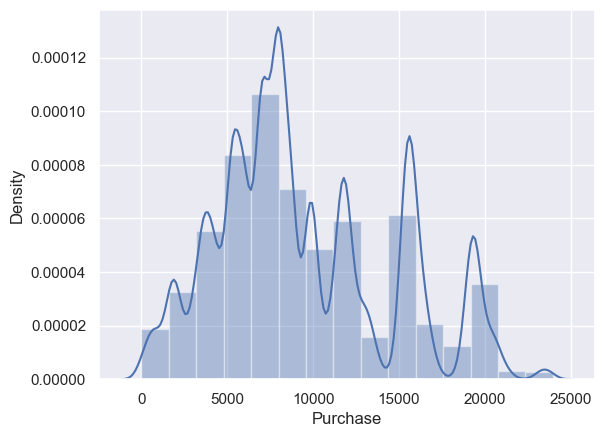


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9434.1225878
sample standard deviation : 5092.180063635965
sample size:  10000
standard error : 50.92180063635965
Margin of Error : 99.81697795326703


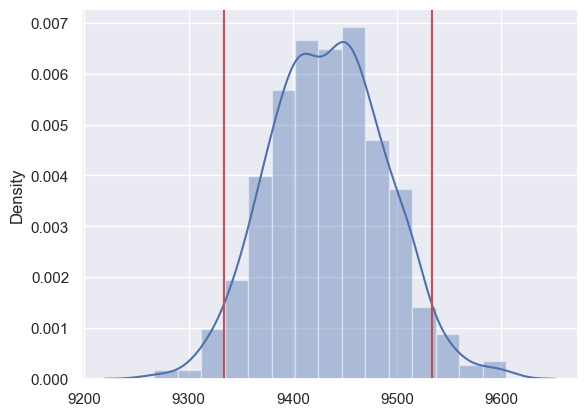

Confidence Interval :  (9334.305609846733, 9533.939565753268)


In [52]:
Bootstrapping_CLT_CI(Male_data["Purchase"],sample_size=10000,trials=500)

## Confidence Interval For Female (Purchase)

Data Distribution before Sampling/Bootstrap:


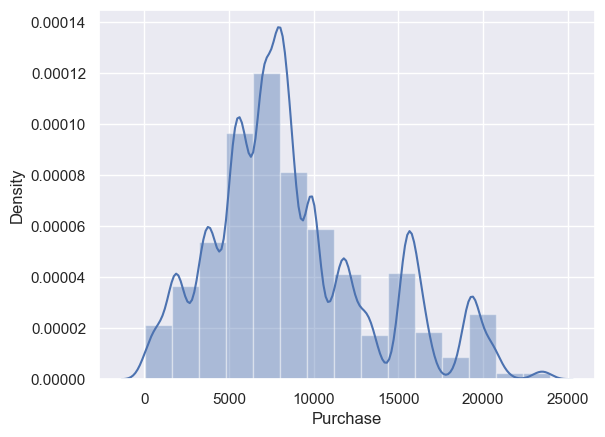


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 8732.055029599998
sample standard deviation : 4767.215738017004
sample size:  10000
standard error : 47.672157380170034
Margin of Error : 93.44702313616553


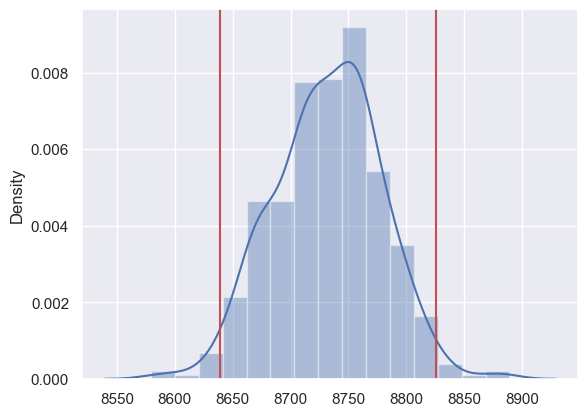

Confidence Interval :  (8638.608006463834, 8825.502052736163)


In [53]:
Bootstrapping_CLT_CI(Female_data["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount with 95% confidence for spendings of Male and Female Customers : 

Confidence Interval :  (9337.709062518998, 9537.343018425532)
Sample Mean : 9437.526040472265  and  Margin of Error : 99.81697795326703
Confidence Interval :  (8641.118742019311, 8828.01278829164)
Sample Mean : 8734.565765155476  and  Margin of Error : 93.44702313616553


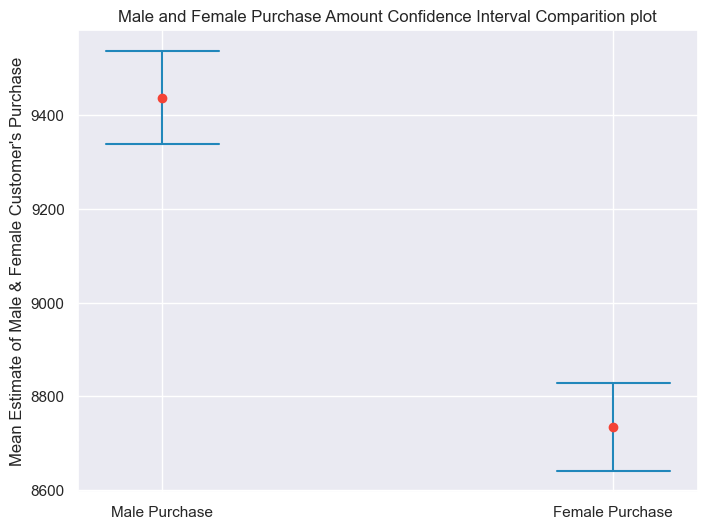

In [54]:
plt.figure(figsize=(8,6))

plot_confidence_interval(x=1,values=Male_data["Purchase"])
plot_confidence_interval(x=2,values=Female_data["Purchase"])
plt.xticks([1,2],["Male Purchase","Female Purchase"])
plt.title("Male and Female Purchase Amount Confidence Interval Comparition plot")
plt.ylabel("Mean Estimate of Male & Female Customer's Purchase")
plt.show()

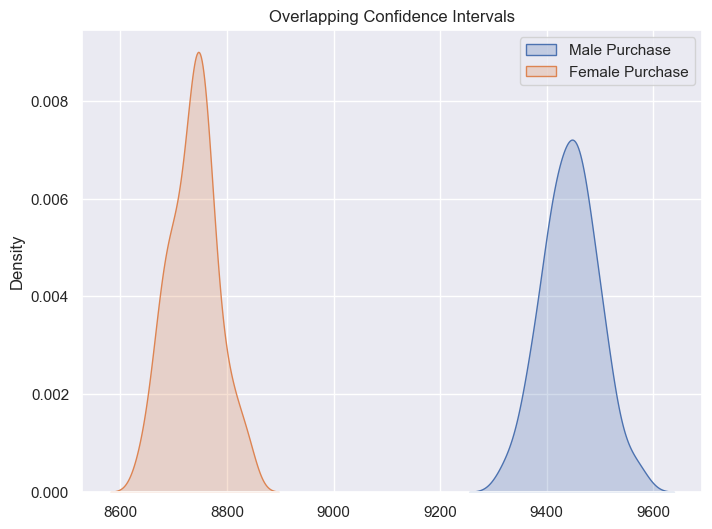

In [55]:
male_expense_mean = [Male_data['Purchase'].sample(10000).mean() for i in range(100)]
female_expense_mean = [Female_data['Purchase'].sample(10000).mean() for i in range(100)]

plt.figure(figsize=(8,6))
sns.kdeplot(male_expense_mean,shade=True,label="Male Purchase")
sns.kdeplot(female_expense_mean,shade=True,label="Female Purchase")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()


##### (with 95% confidence and sample size of 10000 , 500 trials. .)

> - As per confidence Interval comparison for both female purchase and male purchase data , its clear  that there's no over lapping , and hence there's a good amount of difference between Male and Female Spending amounts . 
> - Male Customers are more likely to spend more amount than female customers . 

- Average Male Spending Amount from all 100 million customers lies in Range of 9333 to 9533 as per Bootstrapping Method . 

- Average Female Spending Amount from all 100 million customers lies in Range of 8639 to 8826 as per Bootstrapping Method . 

In [56]:
data = unbiased_data.copy()

In [57]:
data["Age"].value_counts(normalize=True)*100

26-35    39.104302
36-45    20.016677
18-25    18.133853
46-50     8.735228
51-55     7.091492
55+       3.832800
0-17      3.085648
Name: Age, dtype: float64

## Confidence Interval For overall (Purchase) column

Data Distribution before Sampling/Bootstrap:


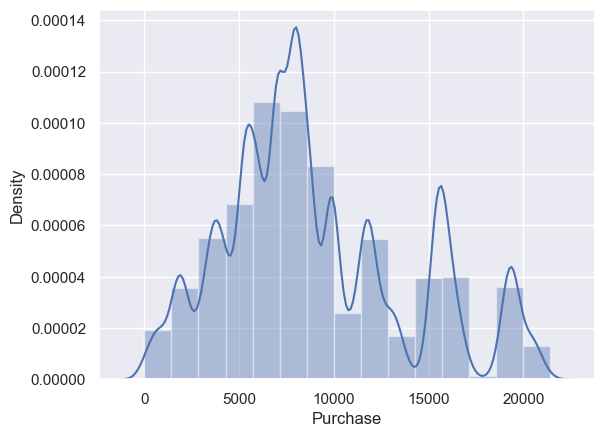


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9028.624307999999
sample standard deviation : 4865.168578531547
sample size:  10000
standard error : 48.651685785315465
Margin of Error : 95.36709595368461


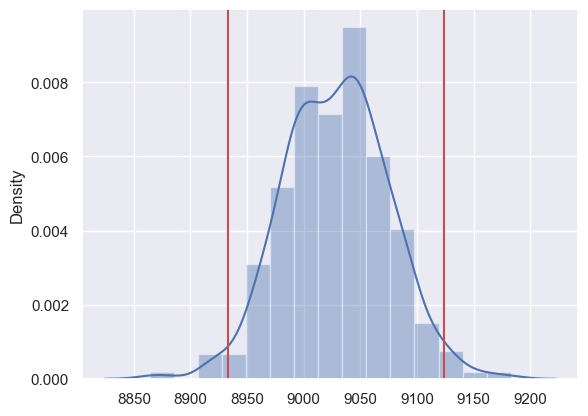

Confidence Interval :  (8933.257212046314, 9123.991403953683)


In [58]:
Bootstrapping_CLT_CI(unbiased_data["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount with 95% confidence for all customers :

Confidence Interval :  (8934.232913639384, 9124.967105546753)
Sample Mean : 9029.600009593069  and  Margin of Error : 95.36709595368461


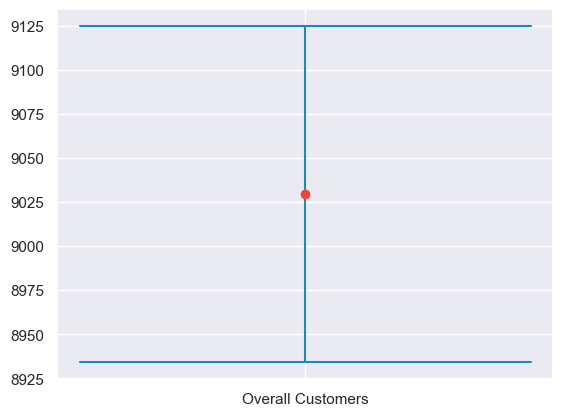

In [59]:
plot_confidence_interval(x=1,values=data["Purchase"])
plt.xticks([1],["Overall Customers"])
plt.show()

> All 100 million customer's average spending amount lies between 8931 to 9122. and sample mean is 9026. 

## Confidence Interval for Married People Purchase Data

Data Distribution before Sampling/Bootstrap:


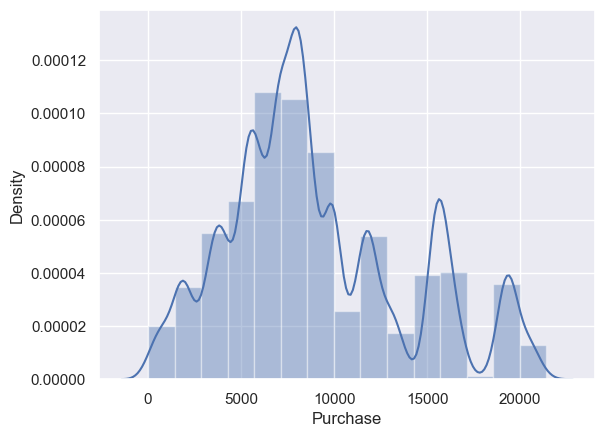


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9034.9488508
sample standard deviation : 4857.193082685389
sample size:  10000
standard error : 48.57193082685389
Margin of Error : 95.21076018332816


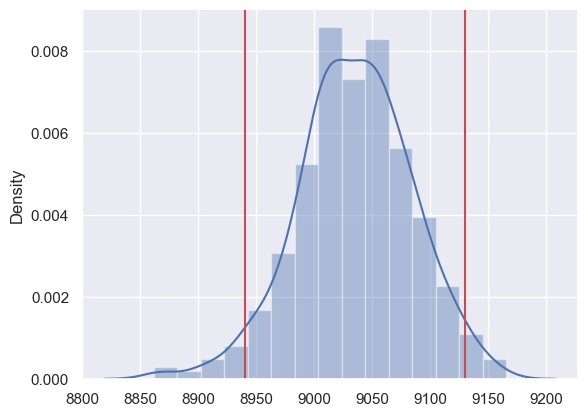

Confidence Interval :  (8939.73809061667, 9130.159610983328)


In [60]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Married"]["Purchase"],sample_size=10000,trials=500)

## Confidence Interval for Single People Purchase Data

Data Distribution before Sampling/Bootstrap:


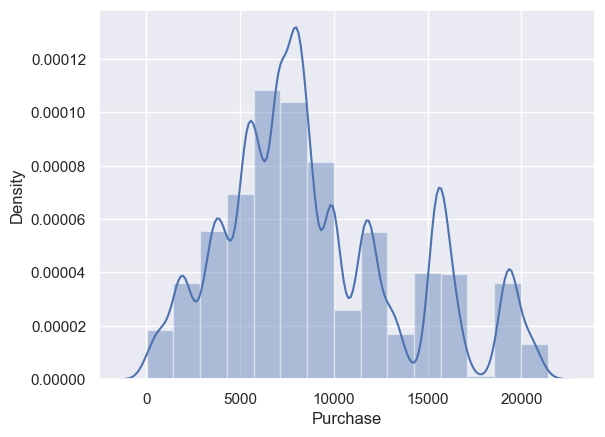


Data Distribution After Sampling/Bootstraping:

t: 1.9602012636213575
sample mean : 9029.3299018
sample standard deviation : 4870.76620640571
sample size:  10000
standard error : 48.707662064057104
Margin of Error : 95.47682072600679


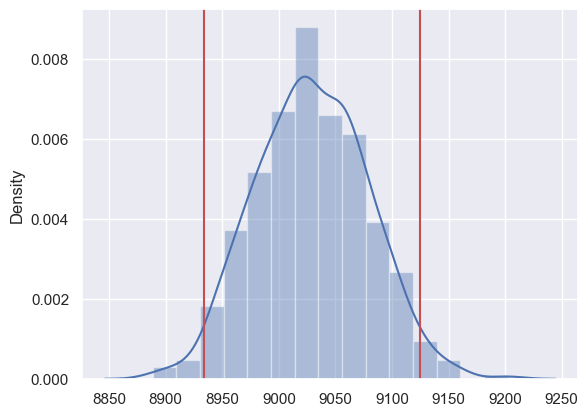

Confidence Interval :  (8933.853081073992, 9124.806722526007)


In [62]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Single"]["Purchase"],sample_size=10000,trials=500)

## Estimate of Average Spending Amount with 95% confidence for Married and Single Customers :

Confidence Interval :  (9162.833506497891, 9359.515641666856)
Sample Mean : 9261.174574082374  and  Margin of Error : 98.3410675844826
Confidence Interval :  (9167.361634404277, 9364.453603438737)
Sample Mean : 9265.907618921507  and  Margin of Error : 98.54598451723068


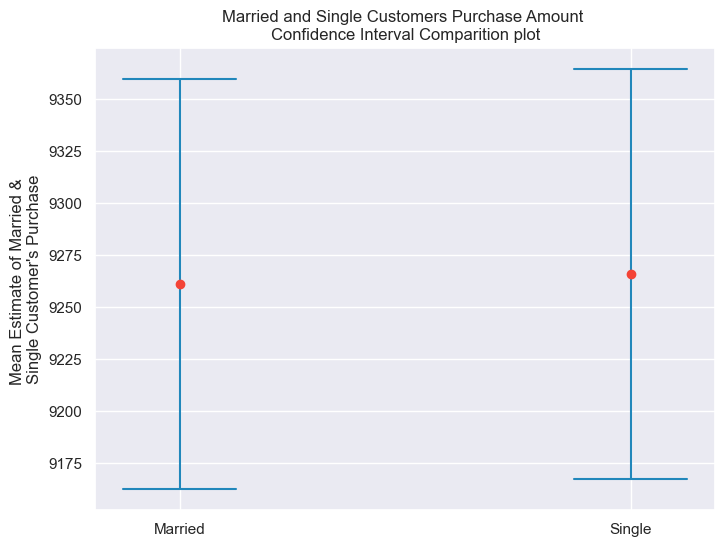

In [64]:
plt.figure(figsize=(8,6))
plot_confidence_interval(x=1,values=Married_data["Purchase"])
plot_confidence_interval(x=2,values=Single_data["Purchase"])
plt.xticks([1,2],["Married","Single"])
plt.title("Married and Single Customers Purchase Amount \nConfidence Interval Comparition plot")
plt.ylabel("Mean Estimate of Married & \nSingle Customer's Purchase")
plt.show()

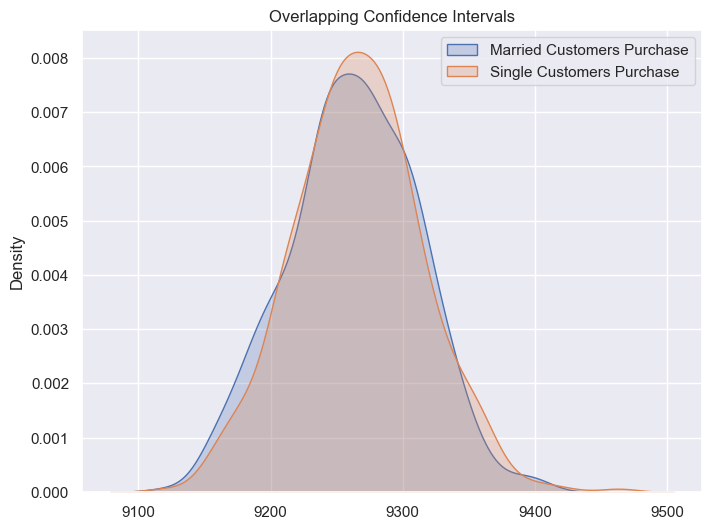

In [65]:
Married_expenses_mean = [Married_data['Purchase'].sample(10000).mean() for i in range(500)]
Single_expenses_mean = [Single_data['Purchase'].sample(10000).mean() for i in range(500)]

plt.figure(figsize=(8,6))
sns.kdeplot(Married_expenses_mean,shade=True,label="Married Customers Purchase")
sns.kdeplot(Single_expenses_mean,shade=True,label="Single Customers Purchase")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()


- As per confidence Interval comparison for both Single and Married Customer's average purchase data 
> There is not much difference between their average spending amounts. Married and Single Customer's spending amounts distribution are almost lies with same distribution.

## Function for findinf Confidence Interval with Different Sample Size

In [66]:
def CI_with_different_sample_size(data,confidence=95 , sample_size=10000,trials = 500):
    
    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    margin_of_error = talfa_by2*standard_error
    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)
    
    print()
    print("Confidence Level : ",confidence)
    print("Sample Size : ",sample_size)
    print("Margin of Error : ",margin_of_error)
    return f"Confidence Interval :,{CI}"


## Confidence Interval Calculations for Different Age Groups

In [67]:
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    print("Age Group : ", age_group)
    print(CI_with_different_sample_size(data.loc[data["Age"]==age_group]["Purchase"]))
    print()
    print()

Age Group :  0-17

Confidence Level :  95
Sample Size :  10000
Margin of Error :  97.23816818506697
Confidence Interval :,(8556.571755614932, 8751.048091985067)


Age Group :  18-25

Confidence Level :  95
Sample Size :  10000
Margin of Error :  96.03792815189837
Confidence Interval :,(8775.5005054481, 8967.576361751897)


Age Group :  26-35

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.12229721763936
Confidence Interval :,(8939.78546398236, 9130.03005841764)


Age Group :  36-45

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.60264317804979
Confidence Interval :,(9060.044856821949, 9251.25014317805)


Age Group :  46-50

Confidence Level :  95
Sample Size :  10000
Margin of Error :  94.39231507302664
Confidence Interval :,(8860.780916326974, 9049.565546473026)


Age Group :  51-55

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.44143450745521
Confidence Interval :,(9157.359046492544, 9348.241915507453)


Age Group :  55+

Conf

##  Estimate of Average Spending Amount with 95% confidence for different age group Customers :

Age Group :  0-17
Confidence Interval :  (8556.031950193505, 8750.50828656364)
Sample Mean : 8653.270118378572  and  Margin of Error : 97.23816818506697
Age Group :  18-25
Confidence Interval :  (8775.692640742054, 8967.76849704585)
Sample Mean : 8871.730568893952  and  Margin of Error : 96.03792815189837
Age Group :  26-35
Confidence Interval :  (8942.785651151926, 9133.030245587206)
Sample Mean : 9037.907948369566  and  Margin of Error : 95.12229721763936
Age Group :  36-45
Confidence Interval :  (9058.927706492923, 9250.132992849023)
Sample Mean : 9154.530349670973  and  Margin of Error : 95.60264317804979
Age Group :  46-50
Confidence Interval :  (8861.970472677765, 9050.755102823818)
Sample Mean : 8956.362787750792  and  Margin of Error : 94.39231507302664
Age Group :  51-55
Confidence Interval :  (9155.942332402015, 9346.825201416925)
Sample Mean : 9251.38376690947  and  Margin of Error : 95.44143450745521
Age Group :  55+
Confidence Interval :  (9005.725664871869, 9191.964362082

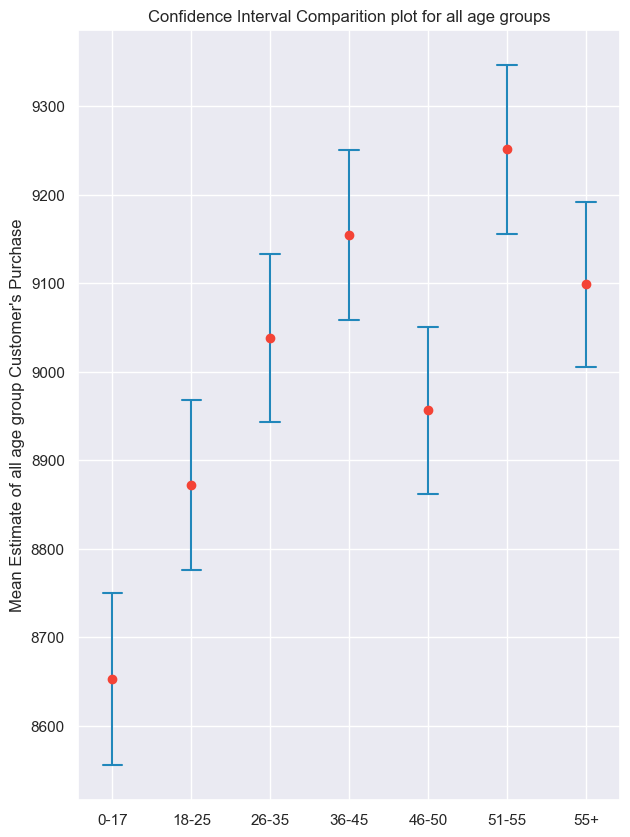

In [68]:
plt.figure(figsize=(7,10))
i = 1
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    print("Age Group : ", age_group)
    (plot_confidence_interval(i,data.loc[data["Age"]==age_group]["Purchase"]))
    i = i+1

plt.xticks([1,2,3,4,5,6,7],['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+'])

plt.title("Confidence Interval Comparition plot for all age groups")
plt.ylabel("Mean Estimate of all age group Customer's Purchase")
plt.show()

    
plt.show()

Age Group :  0-17
Age Group :  18-25
Age Group :  26-35
Age Group :  36-45
Age Group :  46-50
Age Group :  51-55
Age Group :  55+


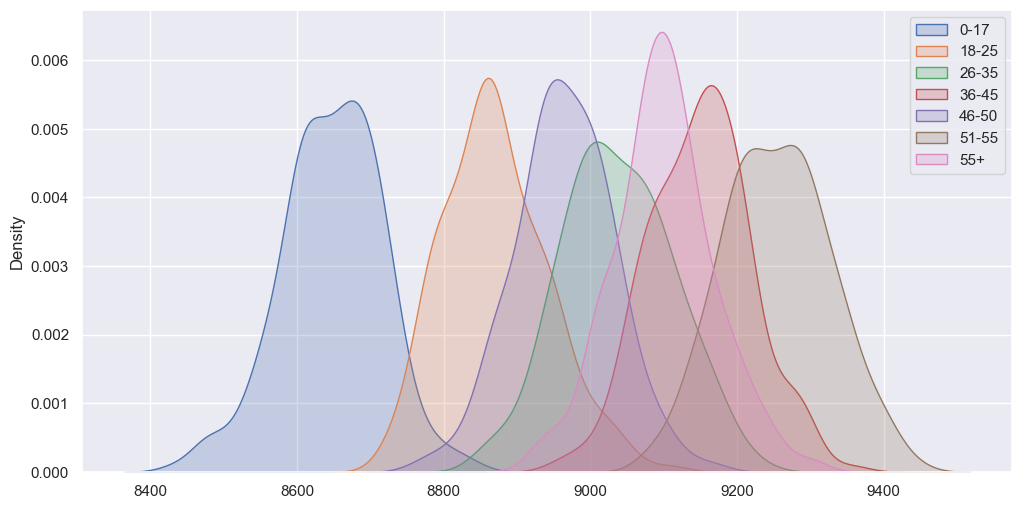

In [69]:
plt.figure(figsize=(12,6))
i = 1
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    
    print("Age Group : ", age_group)
    x = [data.loc[data["Age"]==age_group]['Purchase'].sample(5000,replace=True).mean() for i in range(200)]
    sns.kdeplot(x,shade=True,label=age_group)

    i = i+1


plt.legend()
    
plt.show()

Customers from age 26-35 are 40% of all customers. and their Average Spending amount is near to overall customers average spending amount.

Age group 51-55 customers are more likely to spend more amount than all other groups. and customers under 17 age are the least spending average amount. 

# Impact on Confidence Interval with Different Sample Size

In [70]:
print(CI_with_different_sample_size(data["Purchase"],sample_size=50))
print(CI_with_different_sample_size(data["Purchase"],sample_size=250))
print(CI_with_different_sample_size(data["Purchase"],sample_size=750))
print(CI_with_different_sample_size(data["Purchase"],sample_size=1500))
print(CI_with_different_sample_size(data["Purchase"],sample_size=5000))
print(CI_with_different_sample_size(data["Purchase"],sample_size=25000))


Confidence Level :  95
Sample Size :  50
Margin of Error :  1382.6656096588522
Confidence Interval :,(7635.811190341146, 10401.14240965885)

Confidence Level :  95
Sample Size :  250
Margin of Error :  606.0270420522991
Confidence Interval :,(8427.127677947701, 9639.1817620523)

Confidence Level :  95
Sample Size :  750
Margin of Error :  348.75280488209074
Confidence Interval :,(8669.331021784577, 9366.83663154876)

Confidence Level :  95
Sample Size :  1500
Margin of Error :  246.40593362855563
Confidence Interval :,(8788.816439704779, 9281.62830696189)

Confidence Level :  95
Sample Size :  5000
Margin of Error :  134.88577337459157
Confidence Interval :,(8896.423238625406, 9166.19478537459)

Confidence Level :  95
Sample Size :  25000
Margin of Error :  60.3110663758018
Confidence Interval :,(8968.049758824198, 9088.671891575801)


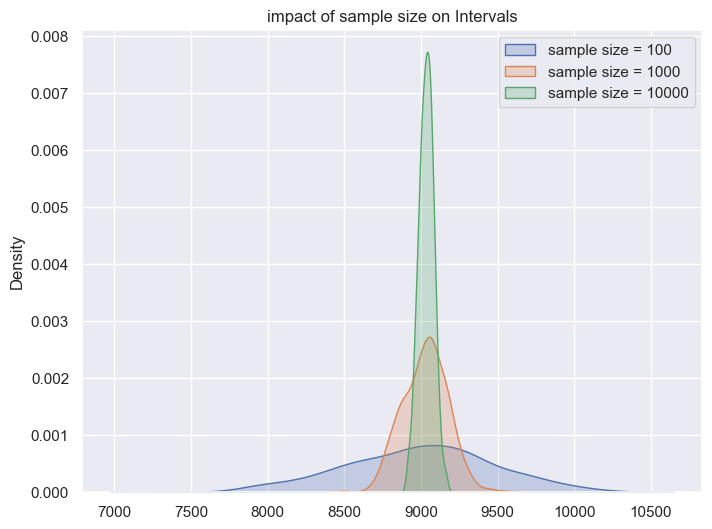

In [71]:
one = [data['Purchase'].sample(100).mean() for i in range(500)]
two = [data['Purchase'].sample(1000).mean() for i in range(500)]
three = [data['Purchase'].sample(10000).mean() for i in range(500)]



plt.figure(figsize=(8,6))
sns.kdeplot(one,shade=True,label="sample size = 100")
sns.kdeplot(two,shade=True,label="sample size = 1000")
sns.kdeplot(three,shade=True,label="sample size = 10000")


plt.title(f"impact of sample size on Intervals")
plt.legend()
plt.show()


> ##### As per calculations and above distribution plot, as we increase the sample size, standard error decreases , means that the average spending amount gets closers and closer to the actual mean spending amount of the all customer average spending amount.



# Impact on Confidence Interval with different Confidence Levels

In [72]:
print(CI_with_different_sample_size(data["Purchase"],confidence=90,sample_size=10000))
print(CI_with_different_sample_size(data["Purchase"],confidence=95,sample_size=10000))
print(CI_with_different_sample_size(data["Purchase"],confidence=99,sample_size=10000))



Confidence Level :  90
Sample Size :  10000
Margin of Error :  80.03231664760949
Confidence Interval :,(8950.180381952392, 9110.245015247612)

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.36709595368461
Confidence Interval :,(8937.356990046315, 9128.091181953685)

Confidence Level :  99
Sample Size :  10000
Margin of Error :  125.34236443769478
Confidence Interval :,(8901.997409162306, 9152.682138037695)


Confidence Interval :  (8959.558996656588, 9099.64102252955)
Sample Mean : 9029.600009593069  and  Margin of Error : 70.04101293648178
Confidence Interval :  (8949.567692945458, 9109.632326240679)
Sample Mean : 9029.600009593069  and  Margin of Error : 80.03231664760949
Confidence Interval :  (8934.232913639384, 9124.967105546753)
Sample Mean : 9029.600009593069  and  Margin of Error : 95.36709595368461
Confidence Interval :  (8904.257645155374, 9154.942374030763)
Sample Mean : 9029.600009593069  and  Margin of Error : 125.34236443769478


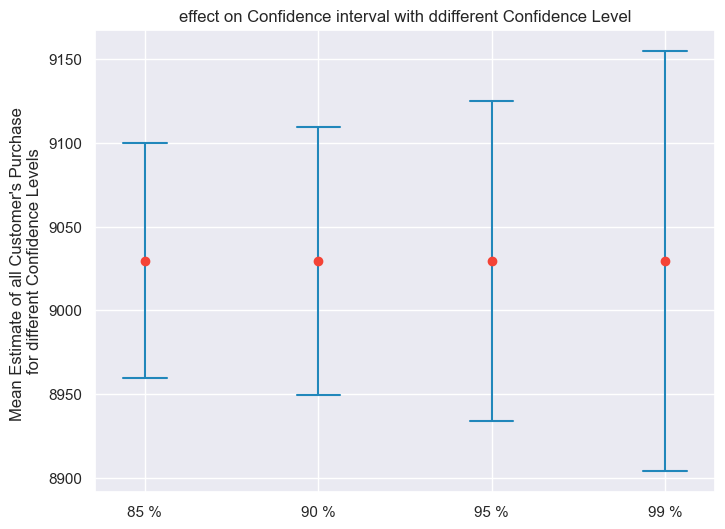

In [73]:
plt.figure(figsize=(8,6))
plot_confidence_interval(x=0,values=data["Purchase"],confidence=85)
plot_confidence_interval(x=1,values=data["Purchase"],confidence=90)
plot_confidence_interval(x=2,values=data["Purchase"],confidence=95)
plot_confidence_interval(x=3,values=data["Purchase"],confidence=99)
plt.xticks([0,1,2,3],["85 %","90 %","95 %","99 %"])
plt.title("effect on Confidence interval with ddifferent Confidence Level")
plt.ylabel("Mean Estimate of all Customer's Purchase \nfor different Confidence Levels")
plt.show()

##### as we decide to increase the confidence level , the interval of confidence for given parameter gets wider. 

# Product Category : 

In [126]:
pd.crosstab(columns= data["Gender"],index=data["Product_Category"],margins=True,normalize="columns")*100

Gender,Female,Male,All
Product_Category,,,
1,18.363408,28.192535,23.288652
10,0.471824,0.546356,0.509171
11,3.504659,4.727227,4.117272
12,1.132968,0.592744,0.862269
13,1.081201,0.950600,1.015758
14,0.460731,0.212063,0.336126
15,0.735838,1.222305,0.979600
16,1.776364,1.778233,1.777301
17,0.045851,0.117813,0.081910


In [127]:
(pd.crosstab(columns= data["Gender"],index=data["Product_Category"],values=data["Purchase"],aggfunc=np.sum)/data["Purchase"].sum())*100

Gender,Female,Male
Product_Category,,
1,13.796160,21.280875
10,0.431819,0.507688
11,0.905548,1.219642
12,0.089074,0.042822
13,0.043840,0.037844
14,0.349964,0.147814
15,0.583333,0.977167
16,1.440983,1.472541
17,0.024945,0.066127


In [128]:
pro_cat = (data.groupby("Product_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
pro_cat

Product_Category
1     35.077035
5     19.918759
8     18.380836
6      6.393728
2      5.355655
3      4.412922
16     2.913524
11     2.125190
15     1.560500
7      1.248089
10     0.939507
4      0.612496
14     0.497777
18     0.154863
12     0.131896
17     0.091072
9      0.083487
13     0.081683
20     0.019734
19     0.001248
Name: Purchase, dtype: float64

In [129]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
471931,1000732,P00010742,Male,26-35,7,B,4+,Single,1,19055
301881,1004459,P00021742,Male,26-35,1,C,4+,Single,5,6956
434930,1000999,P00044942,Male,26-35,15,B,2,Single,1,7898
2697,1000429,P00310142,Male,18-25,0,C,1,Single,5,3523
55320,1002485,P00216442,Male,36-45,14,C,3,Married,5,5367


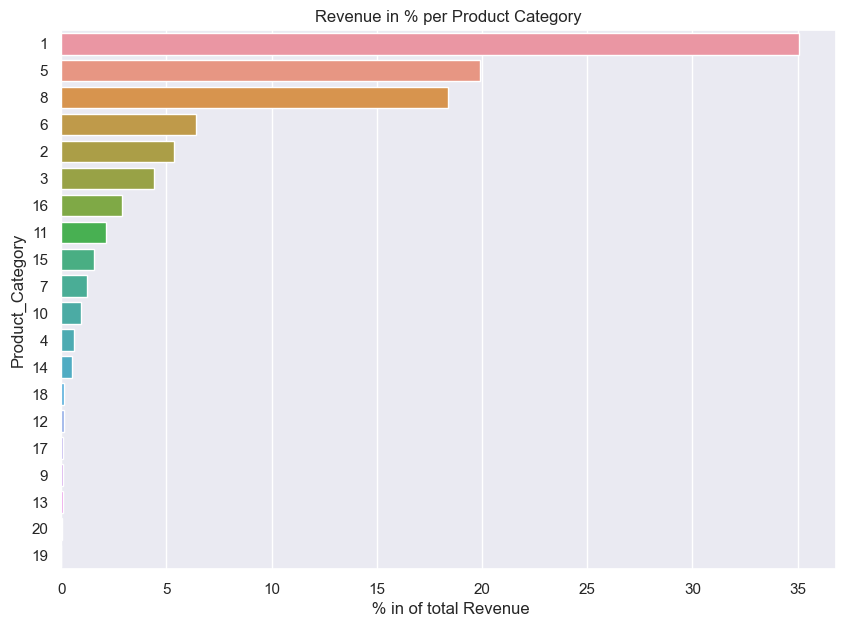

In [130]:
plt.figure(figsize=(10,7))

sns.barplot(x = pro_cat,
           y = pro_cat.index
           )
plt.title("Revenue in % per Product Category")
plt.xlabel(" % in of total Revenue")
plt.show()

In [131]:
(data["Product_Category"].value_counts(normalize=True)*100).sort_values(ascending=False)

5     28.700619
1     23.288652
8     22.127521
2      4.281830
11     4.117272
3      3.935372
6      3.656804
4      2.332223
16     1.777301
13     1.015758
15     0.979600
12     0.862269
7      0.685904
10     0.509171
20     0.480022
18     0.474857
14     0.336126
19     0.302551
17     0.081910
9      0.054238
Name: Product_Category, dtype: float64

# Most Common Product Categories which are sold together : 

In [132]:
groupeddf = data.loc[data["User_ID"].duplicated(keep = False)]

In [133]:
groupeddf.shape

(271012, 10)

In [134]:
groupeddf["Group Order"] = groupeddf.groupby("User_ID")["Product_Category"].transform(lambda  x : ",".join(x))
groupeddf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Group Order
471931,1000732,P00010742,Male,26-35,7,B,4+,Single,1,19055,"1,1,1,6,1,1,12,5,6,11,8,8,6,1,19,1,6,8,5,8,1,8..."
301881,1004459,P00021742,Male,26-35,1,C,4+,Single,5,6956,"5,5,5,4,1,5,1,5,8,5,1,5,5,8,5,8,1,8,8,5,8,8,5,..."
434930,1000999,P00044942,Male,26-35,15,B,2,Single,1,7898,"1,1,1,1,8,1,8,8,1,1,1,1,6,8,1,8,1,5,8,5,1,6,6,..."
2697,1000429,P00310142,Male,18-25,0,C,1,Single,5,3523,"5,6,8,5,6,1,1,5,4,8,8,8,8,1,13,1,1,8,5,6,8,6,2..."
55320,1002485,P00216442,Male,36-45,14,C,3,Married,5,5367,"5,8,8,6,14,8,8,8,8,8,8,6,5,1,1,8,5,1,5,8,8,8,8..."


In [135]:
groupeddf["Group Order"] = groupeddf["Group Order"].apply(lambda x: ",".join(np.unique(x.split(","))))

In [137]:
uniq_orders = groupeddf[["User_ID","Group Order"]].drop_duplicates()

In [138]:
uniq_orders.describe()

,User_ID,Group Order
count,5870,5870
unique,5870,2800
top,1000732,"1,5,8"
freq,1,112


In [139]:
from collections import Counter
from itertools import combinations

In [141]:
freq = Counter()
for r in groupeddf["Group Order"]:
    
    row_list = r.split(",")
    freq.update(Counter(combinations(row_list,4)))
grouped_ordered_categories = freq.most_common(15)
grouped_ordered_categories

[(('1', '2', '5', '8'), 216608),
 (('1', '5', '6', '8'), 211450),
 (('1', '3', '5', '8'), 200065),
 (('1', '11', '5', '8'), 192085),
 (('1', '2', '5', '6'), 187649),
 (('1', '2', '6', '8'), 186960),
 (('2', '5', '6', '8'), 186862),
 (('1', '2', '3', '5'), 184654),
 (('2', '3', '5', '8'), 182485),
 (('1', '2', '3', '8'), 182094),
 (('1', '4', '5', '8'), 181925),
 (('1', '11', '2', '5'), 175109),
 (('1', '11', '2', '8'), 174301),
 (('11', '2', '5', '8'), 174065),
 (('1', '3', '5', '6'), 173311)]

In [143]:
cat_sold_together = pd.DataFrame(data=[217471,211573,198821,190851,189101,188376,188322,184308,
183249,182173,181778,175369,174108,173908,172663],
    index = ["'1', '2', '5', '8'",  "'1', '5', '6', '8'  ","'1', '3', '5', '8'  ",
"'1', '11','5', '8'  ","'1', '2', '5', '6'  ","'1', '2', '6', '8'  ",
"'2', '5', '6', '8'  ","'1', '2', '3', '5'  ","'1', '4', '5', '8'  ",
"'2', '3', '5', '8'  ","'1', '2', '3', '8'  ","'1', '11','2', '5'  ",
"'1', '11','2', '8'  ","'11', '2','5', '8'  ","'1', '3', '5', '6'  "],columns=["Orders"] 
)


In [144]:
cat_sold_together["group_order_in_percentage"] = (cat_sold_together["Orders"]/len(data))*100

In [145]:
group_order_in_percentage = cat_sold_together["group_order_in_percentage"]

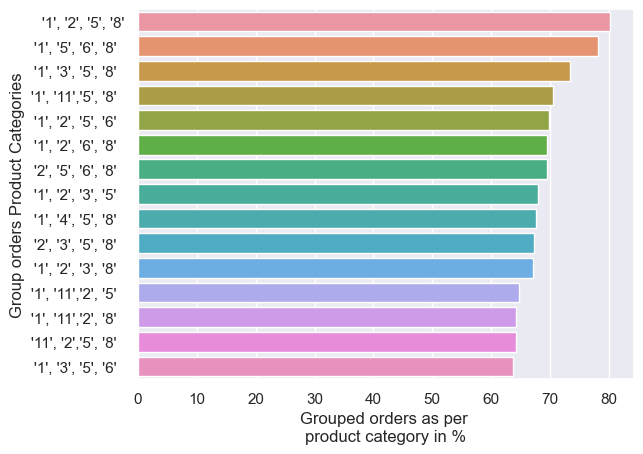

In [146]:
sns.barplot(x = group_order_in_percentage,
           y = group_order_in_percentage.index)
plt.xlabel("Grouped orders as per \nproduct category in %")
plt.ylabel("Group orders Product Categories")
plt.show()

# City Category

In [147]:
data["City_Category"].value_counts(normalize=True)*100

B    42.182571
C    31.196293
A    26.621136
Name: City_Category, dtype: float64

In [148]:
City_cat = (data.groupby("City_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
City_cat

City_Category
B    41.496179
C    32.697426
A    25.806394
Name: Purchase, dtype: float64

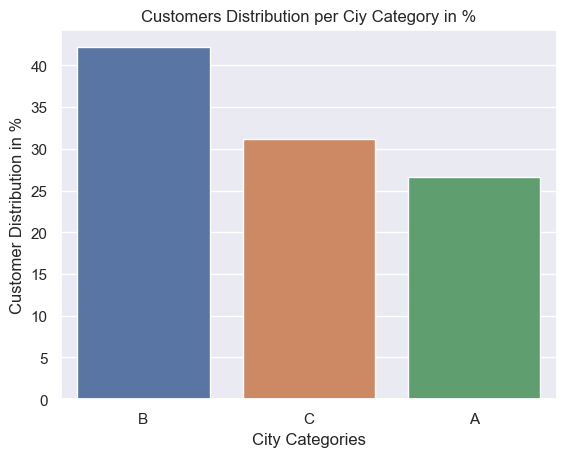

In [149]:
sns.barplot(x = (data["City_Category"].value_counts(normalize=True)*100).index,
            y = (data["City_Category"].value_counts(normalize=True)*100) )

plt.title("Customers Distribution per Ciy Category in %")
plt.xlabel("City Categories")
plt.ylabel("Customer Distribution in %")
plt.show()

In [150]:
pd.crosstab(columns=data["City_Category"],index=data["Age"],normalize="columns")*100

City_Category,A,B,C
Age,,,
0-17,2.478136,2.502471,4.392615
18-25,18.350404,19.170450,16.547409
26-35,49.591828,38.765996,30.612293
36-45,18.599881,20.213073,20.960131
46-50,4.572355,9.544552,11.193244
51-55,4.460091,7.551147,8.715450
55+,1.947305,2.252311,7.578858


- most of Customers from City category A are from 18-45 years age
- most of Customers from City category B are from 18-50 years age
- most of Customers from City category C are from 18-50 years age

# Customers their stay in current city (in years) : 



In [151]:
Stayed_in_city_years_cat = data["Stay_In_Current_City_Years"].value_counts(normalize=True)*100

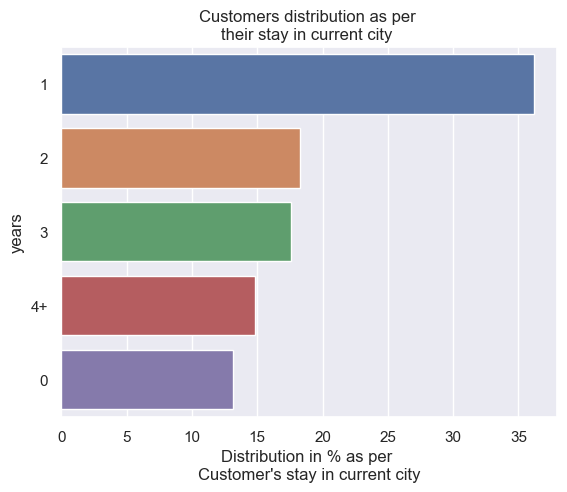

In [152]:
sns.barplot(y = Stayed_in_city_years_cat.index,
             x  = Stayed_in_city_years_cat)
plt.title("Customers distribution as per \ntheir stay in current city ")
plt.ylabel("years")
plt.xlabel("Distribution in % as per \nCustomer's stay in current city")
plt.show()

In [153]:
pd.crosstab(columns=data["City_Category"],index=data["Stay_In_Current_City_Years"],normalize="columns")*100

City_Category,A,B,C
Stay_In_Current_City_Years,,,
0,15.639423,12.403019,12.114582
1,33.823509,37.013129,36.995423
2,18.446037,17.375598,19.290133
3,18.071822,18.682376,15.691121
4+,14.019210,14.525878,15.908741


- all city categories are having customers majorly who are living there for 1 to 2 years.


## revenue generated per age (in % )


In [154]:
ages_d = (data.groupby("Age")["Purchase"].sum()/data["Purchase"].sum())*100

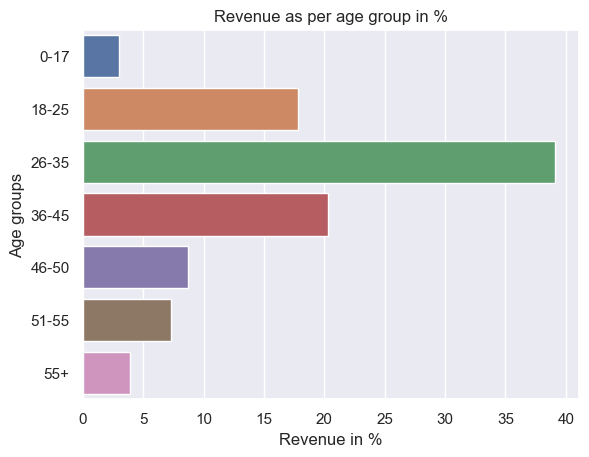

In [155]:
sns.barplot(y = ages_d.index,
             x  = ages_d)
plt.title("Revenue as per age group in %")
plt.ylabel("Age groups")
plt.xlabel("Revenue in %")
plt.show()

## Purchase / Revenue per age / gender group

In [156]:
(pd.crosstab(index= data["Age"],columns=data["Gender"],values=data["Purchase"],aggfunc=np.sum,margins=True)/data["Purchase"].sum())*100

Gender,Female,Male,All
Age,,,
0-17,1.711988,1.245058,2.957046
18-25,8.352357,9.464452,17.816809
26-35,17.917718,21.222564,39.140282
36-45,9.819471,10.474150,20.293621
46-50,4.708982,3.955396,8.664378
51-55,3.580506,3.685167,7.265672
55+,1.819214,2.042979,3.862193
All,47.910235,52.089765,100.000000


- out of all women, 35% of the revenue coming from agae group 18 to 45 and so is same for men as well .

# Observations : 

- Majority of customers are between age 18-45 years . 


- 75% male and 25% are female customers as per given sample data


- from the given data:
>75.31 % customers are male
24.68 % customers are female
from the prproblem statement :
  company has 50 million customers are male and 50 million are female overall.
Given Sample is a gender biased .





- (with 95% confidence and sample size of 10000 , 500 trials. .) As per confidence Interval comparison for both female purchase and male purchase data , its clear that there's no over lapping , and hence there's a good amount of difference between Male and Female Spending amounts .

- Male Customers are more likely to spend more amount than female customers .
- Average Male Spending Amount from all 100 million customers lies in Range of 9333 to 9533 as per Bootstrapping Method .

- Average Female Spending Amount from all 100 million customers lies in Range of 8639 to 8826 as per Bootstrapping Method .








- All 100 million customer's average spending amount lies between 8931 to 9122. and sample mean is 9026.





- As per confidence Interval comparison for both Single and Married Customer's average purchase data
- There is not much difference between their average spending amounts. Married and Single Customer's spending amounts distribution are almost lies with same distribution.



- Customers from age 26-35 are 40% of all customers. and their Average Spending amount is near to overall customers average spending amount.

- Age group 51-55 customers are more likely to spend more amount than all other groups. and customers under 17 age are the least spending average amount.





- we increase the sample size, standard error decreases , means that the average spending amount gets closers and closer to the actual mean spending amount of the all customer average spending amount.



> Top 3 Highest Revenue generating Product Categories : 

- Category 1 is the highest revenue generating Product category ( 35 % )
- Category 5 is the highest revenue generating Product category ( 20 % )
- Category 8 is the highest revenue generating Product category ( 18 % )







- City Category B has highest Customers Base compared to C and A category. 






# Recommendations : 

- City Category B has the highest customer base compared to C and A . Since City Category A and C customers, have the lesser spending average amount that city category B customers, more infrastructure and marketing strategies can be focued on City category A.  
- There is not much significant difference between Married and Single Category Customers, no changes needs to be taken in that area.
- And there is a huge gap and difference between Male and Female spending average amounts and intervals, We can introduce special offers for particularly women like Women's day offer , or mother special or something like that. 
- Age group 0-25 has the lowest spendings compared to other age groups. Since most of the 0-25 age customers would be students , more products related students / teenage / kids recommended to introduce and university/student discount can help increase the revenue from this age group.